# Pakistani population Analysis

## Data was collected from the following [link](https://www.kaggle.com/datasets/mabdullahsajid/population-of-pakistan-dataset)
1. 2017
2. 1998

## *the dataset collected from the source has the following Description*
**About Dataset**
**Description**
This dataset contains demographic information from the Pakistan Population Census conducted in 2017. It provides detailed population data at various administrative levels within Pakistan, including provinces, divisions, districts, and sub-divisions. The dataset also includes information on urban and rural populations, gender distribution, transgender individuals, sex ratios, population figures from the 1998 census, and annual growth rates.

**Features**
**Province**: The administrative provinces or regions of Pakistan where the census data was collected.

**Division**: The divisions within each province. Divisions are the second level of administrative divisions in Pakistan.

**District**: Districts within each division, representing larger administrative units.

**Sub-Division**: Sub-divisions or tehsils within each district, providing more localized data.

**Area**: The land area (in square kilometers) of each sub-division.

**Urban Population 2017**: The population of urban areas within each sub-division for the year 2017.

**Rural Population 2017**: The population of rural areas within each sub-division for the year 2017.

**Male Population 2017**: The male population within each sub-division for the year 2017.

**Female Population 2017**: The female population within each sub-division for the year 2017.

**Transgender Population 2017**: The population of transgender individuals within each sub-division for the year 2017.

Sex Ratio 2017: The sex ratio, calculated as the number of females per 1000 males, within each sub-division for the year 2017.

Population in 1998: The total population of each sub-division as recorded in the 1998 census.

Annual Growth Rate: The annual growth rate of the population in each sub-division, calculated as the percentage increase from 1998 to 2017.

**Data Source**
The data in this dataset was collected from official Pakistan Population Census reports and may include data from various government sources. It is essential to provide proper attribution and reference the original sources when using this dataset for analysis or research.

**Data Usage**
Researchers and analysts can use this dataset to explore demographic trends, population growth, urbanization rates, gender distribution, and more within Pakistan at different administrative levels. Ensure compliance with ethical and legal guidelines when using this data for research or public sharing.

Please note that this description is a template, and you should adapt it based on the actual data sources and specific details of your dataset when creating it for Kaggle or any other platform.

## Purpose of this Analysis
we will fill this at the end on during the process 

In [1]:
# importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as sum
from statsmodels.formula.api import ols

# 01. COMPOSITION

In [2]:
# import the dataset
df = pd.read_csv('./data/data.csv')

In [3]:
# explore the data (composition)
df.head()

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),...,POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN)
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,...,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,...,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,...,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,...,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,...,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROVINCE                    528 non-null    str    
 1   DIVISION                    528 non-null    str    
 2   DISTRICT                    528 non-null    str    
 3   SUB DIVISION                528 non-null    str    
 4   AREA (sq.km)                528 non-null    float64
 5   ALL SEXES (RURAL)           528 non-null    int64  
 6   MALE (RURAL)                528 non-null    int64  
 7   FEMALE (RURAL)              528 non-null    int64  
 8   TRANSGENDER (RURAL)         528 non-null    int64  
 9   SEX RATIO (RURAL)           528 non-null    float64
 10  AVG HOUSEHOLD SIZE (RURAL)  528 non-null    float64
 11  POPULATION 1998 (RURAL)     528 non-null    int64  
 12  ANNUAL GROWTH RATE (RURAL)  528 non-null    float64
 13  ALL SEXES (URBAN)           528 non-null    in

In [5]:
# max column printing option
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),AVG HOUSEHOLD SIZE (RURAL),POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN)
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,6.10,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,6.15,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,6.32,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,6.15,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,6.29,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48


In [7]:
# lets see all columns in the dataset
df.columns

Index(['PROVINCE', 'DIVISION', 'DISTRICT', 'SUB DIVISION', 'AREA (sq.km)',
       'ALL SEXES (RURAL)', 'MALE (RURAL)', 'FEMALE (RURAL)',
       'TRANSGENDER (RURAL)', 'SEX RATIO (RURAL)',
       'AVG HOUSEHOLD SIZE (RURAL)', 'POPULATION 1998 (RURAL)',
       'ANNUAL GROWTH RATE (RURAL)', 'ALL SEXES (URBAN)', 'MALE (URBAN)',
       'FEMALE (URBAN)', 'TRANSGENDER (URBAN)', 'SEX RATIO (URBAN)',
       'AVG HOUSEHOLD SIZE (URBAN)', 'POPULATION 1998 (URBAN)',
       'ANNUAL GROWTH RATE (URBAN)'],
      dtype='str')

In [8]:
# lets have a look on data typesof the columns
df.dtypes

PROVINCE                          str
DIVISION                          str
DISTRICT                          str
SUB DIVISION                      str
AREA (sq.km)                  float64
ALL SEXES (RURAL)               int64
MALE (RURAL)                    int64
FEMALE (RURAL)                  int64
TRANSGENDER (RURAL)             int64
SEX RATIO (RURAL)             float64
AVG HOUSEHOLD SIZE (RURAL)    float64
POPULATION 1998 (RURAL)         int64
ANNUAL GROWTH RATE (RURAL)    float64
ALL SEXES (URBAN)               int64
MALE (URBAN)                    int64
FEMALE (URBAN)                  int64
TRANSGENDER (URBAN)             int64
SEX RATIO (URBAN)             float64
AVG HOUSEHOLD SIZE (URBAN)    float64
POPULATION 1998 (URBAN)         int64
ANNUAL GROWTH RATE (URBAN)    float64
dtype: object

In [9]:
# Summary statistaics of dataset
df.describe()

,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),AVG HOUSEHOLD SIZE (RURAL),POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN)
count,528.000000,5.280000e+02,5.280000e+02,5.280000e+02,528.000000,528.000000,528.000000,5.280000e+02,528.000000,5.280000e+02,5.280000e+02,5.280000e+02,528.000000,528.000000,528.000000,5.280000e+02,528.000000
mean,1492.005871,2.462780e+05,1.252757e+05,1.209841e+05,18.174242,98.982614,6.277064,1.674280e+05,3.124792,1.408635e+05,7.284339e+04,6.799787e+04,22.276515,75.411269,4.406402,8.014457e+04,1.920814
std,2039.453778,2.711898e+05,1.375630e+05,1.337169e+05,25.522248,26.812660,2.074947,1.783890e+05,9.577872,3.512463e+05,1.823492e+05,1.688725e+05,66.068127,49.687341,2.948336,2.023120e+05,2.098908
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,425.000000,5.093450e+04,2.712725e+04,2.397900e+04,1.000000,101.105000,5.700000,3.527350e+04,1.440000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,882.000000,1.652410e+05,8.413450e+04,8.204400e+04,10.000000,105.285000,6.310000,1.172065e+05,2.030000,4.325450e+04,2.198000e+04,2.099900e+04,3.000000,103.195000,5.755000,2.129800e+04,1.855000
75%,1734.250000,3.129112e+05,1.605022e+05,1.522190e+05,25.000000,108.347500,7.200000,2.130542e+05,2.812500,1.178148e+05,6.030175e+04,5.746525e+04,19.000000,107.040000,6.340000,6.542225e+04,2.985000
max,18374.000000,2.297375e+06,1.172995e+06,1.124167e+06,213.000000,139.380000,12.430000,1.044035e+06,100.000000,3.653616e+06,1.905921e+06,1.746900e+06,795.000000,297.810000,10.060000,2.075867e+06,19.780000


In [10]:
# how many are the missing values in the dataset
df.isnull().sum()

PROVINCE                      0
DIVISION                      0
DISTRICT                      0
SUB DIVISION                  0
AREA (sq.km)                  0
ALL SEXES (RURAL)             0
MALE (RURAL)                  0
FEMALE (RURAL)                0
TRANSGENDER (RURAL)           0
SEX RATIO (RURAL)             0
AVG HOUSEHOLD SIZE (RURAL)    0
POPULATION 1998 (RURAL)       0
ANNUAL GROWTH RATE (RURAL)    0
ALL SEXES (URBAN)             0
MALE (URBAN)                  0
FEMALE (URBAN)                0
TRANSGENDER (URBAN)           0
SEX RATIO (URBAN)             0
AVG HOUSEHOLD SIZE (URBAN)    0
POPULATION 1998 (URBAN)       0
ANNUAL GROWTH RATE (URBAN)    0
dtype: int64

<Axes: xlabel='AREA (sq.km)', ylabel='Count'>

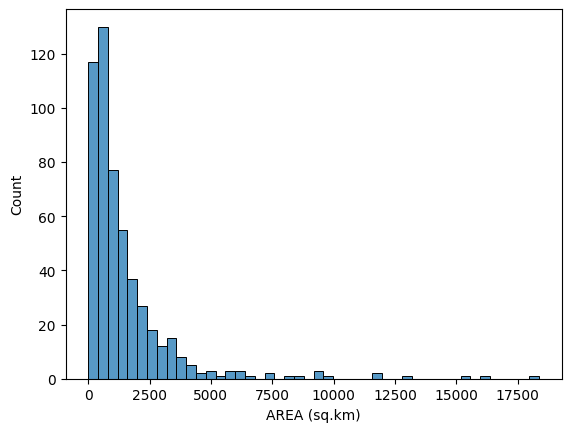

In [11]:
# box plot
sns.histplot(df, x='AREA (sq.km)' )

<Axes: ylabel='AREA (sq.km)'>

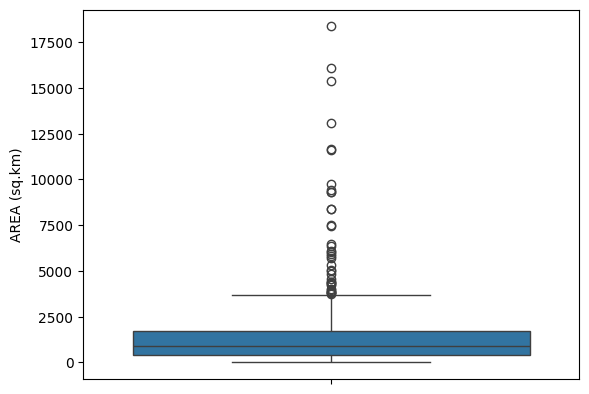

In [12]:
sns.boxplot(df, y='AREA (sq.km)' )

In [13]:
df.describe().T # transpose of the describe the dataset

,count,mean,std,min,25%,50%,75%,max
AREA (sq.km),528.0,1492.005871,2039.453778,0.0,425.000,882.000,1734.2500,18374.00
ALL SEXES (RURAL),528.0,246278.011364,271189.816559,0.0,50934.500,165241.000,312911.2500,2297375.00
MALE (RURAL),528.0,125275.687500,137563.021458,0.0,27127.250,84134.500,160502.2500,1172995.00
FEMALE (RURAL),528.0,120984.149621,133716.898296,0.0,23979.000,82044.000,152219.0000,1124167.00
TRANSGENDER (RURAL),528.0,18.174242,25.522248,0.0,1.000,10.000,25.0000,213.00
SEX RATIO (RURAL),528.0,98.982614,26.812660,0.0,101.105,105.285,108.3475,139.38
AVG HOUSEHOLD SIZE (RURAL),528.0,6.277064,2.074947,0.0,5.700,6.310,7.2000,12.43
POPULATION 1998 (RURAL),528.0,167427.994318,178388.976993,0.0,35273.500,117206.500,213054.2500,1044035.00
ANNUAL GROWTH RATE (RURAL),528.0,3.124792,9.577872,0.0,1.440,2.030,2.8125,100.00
ALL SEXES (URBAN),528.0,140863.528409,351246.279136,0.0,0.000,43254.500,117814.7500,3653616.00


In [14]:
df.columns

Index(['PROVINCE', 'DIVISION', 'DISTRICT', 'SUB DIVISION', 'AREA (sq.km)',
       'ALL SEXES (RURAL)', 'MALE (RURAL)', 'FEMALE (RURAL)',
       'TRANSGENDER (RURAL)', 'SEX RATIO (RURAL)',
       'AVG HOUSEHOLD SIZE (RURAL)', 'POPULATION 1998 (RURAL)',
       'ANNUAL GROWTH RATE (RURAL)', 'ALL SEXES (URBAN)', 'MALE (URBAN)',
       'FEMALE (URBAN)', 'TRANSGENDER (URBAN)', 'SEX RATIO (URBAN)',
       'AVG HOUSEHOLD SIZE (URBAN)', 'POPULATION 1998 (URBAN)',
       'ANNUAL GROWTH RATE (URBAN)'],
      dtype='str')

<Axes: xlabel='DIVISION', ylabel='ALL SEXES (RURAL)'>

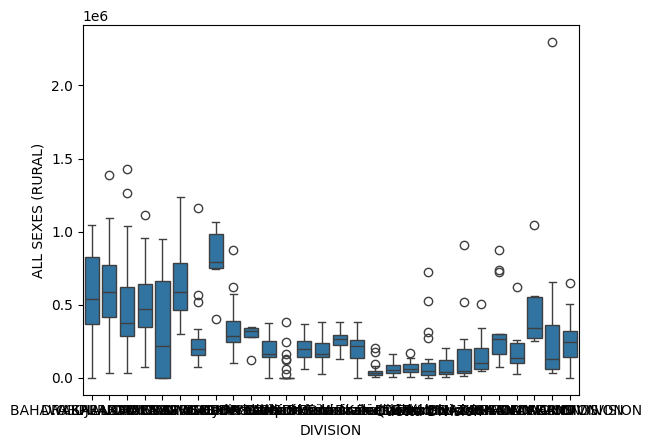

In [15]:
sns.boxplot(df, y='ALL SEXES (RURAL)', x='DIVISION')

In [16]:
# it is very hard to plot, therefore, we will use groupby function to make tabulated data output
df['PROVINCE'].unique()

<StringArray>
['PUNJAB', 'SINDH', 'BALOCHISTAN', 'KPK', 'KPK/FATA']
Length: 5, dtype: str

In [17]:
len(df)

528

In [18]:
df['PROVINCE'].nunique()

5

In [19]:
df['DISTRICT'].nunique()

131

In [20]:
df.groupby(['DIVISION']).size().sort_values()

DIVISION
Badin Division                   5
MARDAN DIVISION                  7
SAHIWAL DIVISION                 7
KOHAT DIVISION                  14
MULTAN DIVISION                 14
D.G.KHAN DIVISION               14
DERA ISMAIL KHAN DIVISION       15
HAZARA DIVISION                 15
BANNU DIVISION                  15
Shaheed Benazirabad Division    15
BAHAWALPUR DIVISION             15
LAHORE DIVISION                 17
SARGODHA DIVISION               17
FAISALABAD DIVISION             17
Kalat Division                  18
PESHAWAR DIVISION               18
Mirpurkhas Division             18
Sukkur Division                 18
Zhob Division                   19
Naseerabad Division             19
GUJRANWALA DIVISION             20
Larkana Division                21
RAWALPINDI DIVISION             22
Hyderabad Division              30
Karachi Division                30
MALAKAND DIVISION               33
Makran Division                 37
Quetta Division                 38
dtype: int6

In [21]:
df.head()

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),AVG HOUSEHOLD SIZE (RURAL),POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN)
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,6.10,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,6.15,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,6.32,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,6.15,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,6.29,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48


In [22]:
df.groupby('DISTRICT')['TRANSGENDER (RURAL)'].mean()

DISTRICT
ABBOTTABAD DISTRICT      13.250000
ATTOCK DISTRICT          13.000000
AWARAN DISTRICT           2.000000
BADIN DISTRICT           21.400000
BAHAWALNAGAR DISTRICT    41.600000
                           ...    
UPPER DIR DISTRICT       16.833333
VEHARI DISTRICT          68.666667
WASHUK DISTRICT           0.200000
ZHOB DISTRICT             0.200000
ZIARAT DISTRICT          11.000000
Name: TRANSGENDER (RURAL), Length: 131, dtype: float64

In [23]:
df.groupby(['PROVINCE', 'DIVISION', 'DISTRICT', 'SUB DIVISION'])['POPULATION 1998 (RURAL)'].mean()

PROVINCE     DIVISION         DISTRICT         SUB DIVISION      
BALOCHISTAN  Kalat Division   KALAT DISTRICT   GAZG SUB-TEHSIL         3979.0
                                               JOHAN SUB-TEHSIL       12299.0
                                               KALAT TEHSIL           63919.0
                                               MANGOCHAR TEHSIL       41590.0
                                               SURAB TEHSIL           82253.0
                                                                       ...   
SINDH        Sukkur Division  SUKKUR DISTRICT  NEW SUKKUR TALUKA      29374.0
                                               PANO AQIL TALUKA      205976.0
                                               ROHRI TALUKA          166453.0
                                               SALEHPAT TALUKA        64646.0
                                               SUKKUR CITY TALUKA      2833.0
Name: POPULATION 1998 (RURAL), Length: 528, dtype: float64

In [24]:
df.groupby(['PROVINCE', 'DIVISION'])['POPULATION 1998 (RURAL)'].mean()

PROVINCE     DIVISION                    
BALOCHISTAN  Kalat Division                   34953.666667
             Makran Division                  30517.081081
             Naseerabad Division              45926.000000
             Quetta Division                  39651.921053
             Zhob Division                    43845.157895
KPK          BANNU DIVISION                  267784.500000
             DERA ISMAIL KHAN DIVISION       154943.833333
             HAZARA DIVISION                 213571.066667
             KOHAT DIVISION                  151992.285714
             MALAKAND DIVISION               167573.346154
             MARDAN DIVISION                 287508.857143
             PESHAWAR DIVISION               374429.000000
KPK/FATA     BANNU DIVISION                   34714.636364
             DERA ISMAIL KHAN DIVISION        52092.333333
             KOHAT DIVISION                   79378.000000
             MALAKAND DIVISION                85032.428571
             P

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AREA (sq.km),528.0,1492.005871,2039.453778,0.0,425.000,882.000,1734.2500,18374.00
ALL SEXES (RURAL),528.0,246278.011364,271189.816559,0.0,50934.500,165241.000,312911.2500,2297375.00
MALE (RURAL),528.0,125275.687500,137563.021458,0.0,27127.250,84134.500,160502.2500,1172995.00
FEMALE (RURAL),528.0,120984.149621,133716.898296,0.0,23979.000,82044.000,152219.0000,1124167.00
TRANSGENDER (RURAL),528.0,18.174242,25.522248,0.0,1.000,10.000,25.0000,213.00
SEX RATIO (RURAL),528.0,98.982614,26.812660,0.0,101.105,105.285,108.3475,139.38
AVG HOUSEHOLD SIZE (RURAL),528.0,6.277064,2.074947,0.0,5.700,6.310,7.2000,12.43
POPULATION 1998 (RURAL),528.0,167427.994318,178388.976993,0.0,35273.500,117206.500,213054.2500,1044035.00
ANNUAL GROWTH RATE (RURAL),528.0,3.124792,9.577872,0.0,1.440,2.030,2.8125,100.00
ALL SEXES (URBAN),528.0,140863.528409,351246.279136,0.0,0.000,43254.500,117814.7500,3653616.00


In [26]:
df['ALL SEXES (URBAN)'].sum() # the Rural population of Pakistan in 2017 was

np.int64(74375943)

In [27]:
df['POPULATION 1998 (URBAN)'].sum()

np.int64(42316331)

In [28]:
pop_urban_1998 = df['POPULATION 1998 (URBAN)'].sum()
pop_urban_2017 = df['ALL SEXES (URBAN)'].sum()
# Difference in population
pop_diff_urban = pop_urban_2017 - pop_urban_1998
print("the urban population of pakistan increase by", pop_diff_urban, "in 2017 from 1998.")

the urban population of pakistan increase by 32059612 in 2017 from 1998.


# Percentage b/w 1998 to 2017

In [29]:
per_of_urban_pop = (pop_diff_urban/pop_urban_1998) * 100
print("the urban population of pakistan increase by:", per_of_urban_pop, "% in 2017 from 1998.")

the urban population of pakistan increase by: 75.76179513294761 % in 2017 from 1998.


---

In [30]:
print("The Total Rural Population of Pakistan in 2017 was: ",df['ALL SEXES (RURAL)'].sum())

The Total Rural Population of Pakistan in 2017 was:  130034790


In [31]:
# How much Rural Population increased from 1998 - 2017?
pop_rural_1998 = df['POPULATION 1998 (RURAL)'].sum()
pop_rural_2017 = df['ALL SEXES (RURAL)'].sum()
pop_change_rural =  pop_rural_2017 - pop_rural_1998
pop_change_rural
print("The total Rural Population of Pakistan have been increased by 2017 as compared to 1998, and is as follows:",pop_change_rural)

The total Rural Population of Pakistan have been increased by 2017 as compared to 1998, and is as follows: 41632809


# ASSIGNMENT: ***Calculate the percent change of Population?***

In [32]:
percentage_of_pop = (pop_change_rural/pop_rural_1998) * 100
print("The RURAL Population of Pakistan increase by:", percentage_of_pop ,"%, in 2017 from 1998.")

The RURAL Population of Pakistan increase by: 47.094882409931515 %, in 2017 from 1998.


# ASSIGNMENT: 

 **How to combine 3 columns in one column? make a separate data of everything based on Sex (Male, Female and Transgender?)**

In [33]:
df.head()

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),AVG HOUSEHOLD SIZE (RURAL),POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN)
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,6.10,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,6.15,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,6.32,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,6.15,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,6.29,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48


In [34]:
df['ALL SEXES (RURAL)'].sum()

np.int64(130034790)

In [35]:
df.groupby('ALL SEXES (RURAL)')['FEMALE (RURAL)'].mean()

ALL SEXES (RURAL)
0                0.0
2665          1223.0
2868          1420.0
5184          2539.0
5721          2609.0
             ...    
1238708     602391.0
1267317     616147.0
1385109     673133.0
1425154     694280.0
2297375    1124167.0
Name: FEMALE (RURAL), Length: 495, dtype: float64

In [38]:
df.columns

Index(['PROVINCE', 'DIVISION', 'DISTRICT', 'SUB DIVISION', 'AREA (sq.km)',
       'ALL SEXES (RURAL)', 'MALE (RURAL)', 'FEMALE (RURAL)',
       'TRANSGENDER (RURAL)', 'SEX RATIO (RURAL)',
       'AVG HOUSEHOLD SIZE (RURAL)', 'POPULATION 1998 (RURAL)',
       'ANNUAL GROWTH RATE (RURAL)', 'ALL SEXES (URBAN)', 'MALE (URBAN)',
       'FEMALE (URBAN)', 'TRANSGENDER (URBAN)', 'SEX RATIO (URBAN)',
       'AVG HOUSEHOLD SIZE (URBAN)', 'POPULATION 1998 (URBAN)',
       'ANNUAL GROWTH RATE (URBAN)'],
      dtype='str')

In [40]:
id_vars=['PROVINCE, DIVISION, DISTRICT, SUB DIVISION, AREA (sq.km)']

In [42]:
df_long = df.melt(
    id_vars=[
        'PROVINCE',
        'DIVISION',
        'DISTRICT',
        'SUB DIVISION',
        'AREA (sq.km)'
    ],
    value_vars=[
        'MALE (RURAL)',
        'FEMALE (RURAL)',
        'TRANSGENDER (RURAL)'
    ],
    var_name='sex',
    value_name='population'
)

In [43]:
df_long['sex'] = df_long['sex'].str.replace(' (RURAL)', '', regex=False)

In [44]:
df_long.head()

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),sex,population
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,MALE,316864
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,MALE,273788
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,MALE,182655
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,MALE,192278
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,MALE,231506


---
# urban

In [49]:
df_urban = df.melt(
    id_vars=[
        'PROVINCE',
        'DIVISION',
        'DISTRICT',
        'SUB DIVISION',
        'AREA (sq.km)'
    ],
    value_vars=[
        'MALE (URBAN)',
        'FEMALE (URBAN)',
        'TRANSGENDER (URBAN)'
    ],
    var_name='sex',
    value_name='population'
)

In [50]:
df_urban['sex'] = df_urban['sex'].str.replace(' (URBAN)', '', regex=False)

In [51]:
df_urban.head()

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),sex,population
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,MALE,98391
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,MALE,75546
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,MALE,31360
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,MALE,71345
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,MALE,36694


In [53]:
df_urban.groupby('sex')['population'].sum()

sex
FEMALE         35902873
MALE           38461308
TRANSGENDER       11762
Name: population, dtype: int64

In [54]:
df_long.groupby('sex')['population'].sum()

sex
FEMALE         35902873
MALE           38461308
TRANSGENDER       11762
Name: population, dtype: int64

In [57]:
df_long.max()

PROVINCE                  SINDH
DIVISION          Zhob Division
DISTRICT        ZIARAT DISTRICT
SUB DIVISION      ZIARAT TEHSIL
AREA (sq.km)            18374.0
sex                 TRANSGENDER
population              1905921
dtype: object

In [63]:
df_rural = df_long.rename(columns={'population': 'rural_population'})
df_urban = df_urban.rename(columns={'population': 'urban_population'})

In [70]:
df_urban = df_urban.rename(columns={'population': 'urban_population'})

In [64]:
df_combined = pd.merge(
    df_rural,
    df_urban,
    on=['PROVINCE', 'DIVISION', 'DISTRICT', 'SUB DIVISION', 'AREA (sq.km)', 'sex'],
    how='inner'
)

In [67]:
df_combined.columns

Index(['PROVINCE', 'DIVISION', 'DISTRICT', 'SUB DIVISION', 'AREA (sq.km)',
       'sex', 'rural_population', 'population_urban'],
      dtype='str')

In [72]:
df_combined['urban_rural_difference'] = (
    df_combined['population_urban'] - df_combined['rural_population']
)

In [77]:
df_combined[['sex', 'rural_population', 'population_urban', 'urban_rural_difference']].head()

,sex,rural_population,population_urban,urban_rural_difference
0,MALE,98391,98391,0
1,MALE,75546,75546,0
2,MALE,31360,31360,0
3,MALE,71345,71345,0
4,MALE,36694,36694,0
